In [ ]:
model_handle_map = {"efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"}
model_image_size_map = {"efficientnetv2-b0": 224}

In [ ]:
!pip install --force-reinstall albumentations==1.0.3

     |████████████████████████████████| 98 kB 3.3 MB/s 
     |████████████████████████████████| 47.6 MB 1.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 15.7 MB 21.4 MB/s 
     |████████████████████████████████| 55.4 MB 1.2 MB/s 
     |████████████████████████████████| 596 kB 70.7 MB/s 
     |████████████████████████████████| 3.3 MB 74.0 MB/s 
     |████████████████████████████████| 6.1 MB 42.1 MB/s 
     |████████████████████████████████| 40 kB 5.5 MB/s 
     |████████████████████████████████| 3.1 MB 67.4 MB/s 
     |████████████████████████████████| 1.9 MB 47.7 MB/s 
     |████████████████████████████████| 178 kB 59.8 MB/s 
     |████████████████████████████████| 97 kB 6.7 MB/s 
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.6
    Uninstalling pyparsing-3.0.6:
      Successfully uninstalled pyparsing-3.0.6
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninst

In [ ]:
pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [ ]:
pip install scikit-plot

In [ ]:
pip install functools

  ERROR: Failed building wheel for functools
  Running setup.py clean for functools
Failed to build functools
    Running setup.py install for functools ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-5hoc8p2r/functools_03657cd051754e22aacfe7119ff342cf/setup.py'"'"'; __file__='"'"'/tmp/pip-install-5hoc8p2r/functools_03657cd051754e22aacfe7119ff342cf/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-5qkuojs6/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/functools Check the logs for full command output.


In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 4.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.


In [ ]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow_addons as tfa

from sklearn.metrics import *
import scikitplot as skplt

from functools import partial
import albumentations as A
import matplotlib.pyplot as plt
import seaborn as sns

AUTOTUNE = tf.data.experimental.AUTOTUNE
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Folds.csv',encoding='utf-8')
img_dir = '/content/drive/MyDrive/Colab Notebooks/BreaKHis_v1/'
class_names = ['benign', 'malignant']

In [ ]:
data

,fold,mag,grp,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
...,...,...,...,...
39540,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
39541,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
39542,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...
39543,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...


In [ ]:
data = data.rename(columns={'filename':'path'})

,fold,mag,grp,path,label
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign
...,...,...,...,...,...
39540,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...,malignant
39541,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...,malignant
39542,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...,malignant
39543,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...,malignant


In [ ]:
data = data.rename(columns={'filename':'path'})
data['label'] = data.path.apply(lambda x: x.split('/')[3])
data['label_int'] = data.label.apply(lambda x: class_names.index(x))
data['filename'] = data.path.apply(lambda x: x.split('/')[-1])
data.head(3)

,fold,mag,grp,path,label,label_int,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-001.png
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-002.png
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-003.png


Count of Benign    :  12400
Count of Malignant :  27145


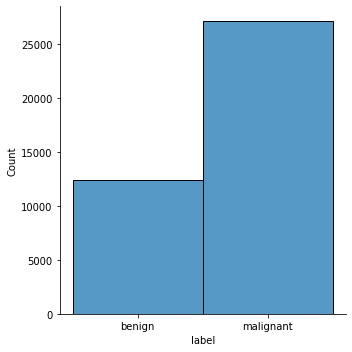

In [ ]:
ax = sns.displot(data=data, x='label')
print('Count of Benign    : ', data[data.label == 'benign'].label.count())
print('Count of Malignant : ', data[data.label == 'malignant'].label.count())

In [ ]:
# remove 600 from dataset for testing
test_df = data.groupby('label').sample(n=300)
train_df = data.drop(test_df.index).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# split training and validation set
valid_df = train_df.sample(frac=0.2)
train_df = train_df.drop(valid_df.index).reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)


print('Training set')
print(train_df.label.value_counts())

print('\nValidation set')
print(valid_df.label.value_counts())

print('\nTest set')
print(test_df.label.value_counts())

Training set
malignant    21458
benign        9698
Name: label, dtype: int64

Validation set
malignant    5387
benign       2402
Name: label, dtype: int64

Test set
benign       300
malignant    300
Name: label, dtype: int64


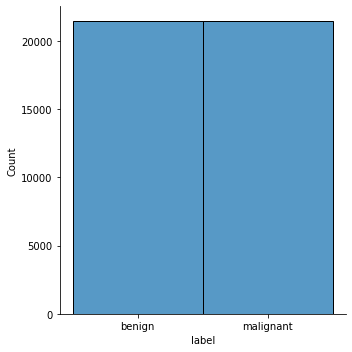

In [ ]:
# upsampling training dataset
max_count = np.max(train_df.label.value_counts())
min_count = np.min(train_df.label.value_counts())
train_df = train_df.groupby('label').sample(n=max_count, replace=True)
train_df = train_df.reset_index(drop=True)
train_df.label.value_counts()

ax = sns.displot(data=train_df, x='label')

In [ ]:
def parse_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    return img, label

def resize_rescale(image, label):
    img = tf.cast(image, tf.float32)
    img = tf.image.resize(img, [IMAGE_SIZE, IMAGE_SIZE])/255
    return img, label

def aug_fn(image): 
    transforms = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.Rotate(p=0.5, limit=15),
        A.RandomBrightnessContrast(p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.1, 0.1)),#, brightness_by_max=True),
        A.RandomResizedCrop(p=0.8, height=IMAGE_SIZE, width=IMAGE_SIZE, scale=(0.9, 1.1), ratio=(0.05, 1.1), interpolation=0),
        A.Blur(p=0.3, blur_limit=(1, 1)),
    ])
    data = {"image":image}
    aug_data = transforms(**data)
    aug_img = aug_data["image"]
    aug_img = tf.cast(aug_img, tf.float32)
    aug_img = tf.image.resize(aug_img, [IMAGE_SIZE, IMAGE_SIZE])/255
    return aug_img

def augmentor(image, label):
    aug_img = tf.numpy_function(func=aug_fn, inp=[image], Tout=tf.float32)
    return aug_img, label

def view_image(ds, col=8, row=2, size=(25,7)):
    plt.figure(figsize=size)
    plt.subplots_adjust(wspace=0.05, hspace=0.15)
    for images, labels in ds.take(1):
        for i in range(col*row):
            ax = plt.subplot(row, col, i + 1)
            shape = str(images[i].numpy().shape)
            plt.imshow(images[i].numpy())
            plt.title(class_names[labels[i].numpy()])
            plt.axis("off") 
    plt.tight_layout
    return None

def training_history(history):
    accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']

    loss = history['loss']
    val_loss = history['val_loss']

    epochs_range = range(len(history['loss']))

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training accuracy')
    plt.plot(epochs_range, val_accuracy, label='Validation accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()
    return None

def decode_test(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, [224, 224])/255
    return img

def build_network(image_size):
    print('building model...')
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(image_size, image_size, 3)),
        hub.KerasLayer(model_handle, trainable=True, name='base_model'),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid', name='classifier') 
    ],name=model_name)
    model.build((None, image_size, image_size, 3))
    model.summary()
    print('model loaded!!!')
    return model

def view_prediction():
    plt.figure(figsize=(25,8))
    plt.rcParams.update({'font.size': 8})
    plt.subplots_adjust(wspace=0.05, hspace=0.15)
    for i in range(30):
        ax = plt.subplot(3, 10, i + 1)
        shape = str(test_img[i].numpy().shape)
        plt.imshow(test_img[i].numpy())
        plt.title(pred_label[i][0])
        plt.axis("off") 
        plt.tight_layout
    return None 

def view_wrong_prediction(df):
    plt.figure(figsize=(len(df)*4,8))
    plt.rcParams.update({'font.size': 8})
    plt.subplots_adjust(wspace=0.05, hspace=0.15)
    for i in range(len(df)):
        img = decode_test(img_dir+df.path.iloc[i])
        ax = plt.subplot(1, len(df), i + 1)
        plt.imshow(img)
        plt.title('wrongly predicted as '+df.prediction.iloc[i])
        plt.axis("off") 
        plt.tight_layout
    return None 

In [ ]:
model_name = 'efficientnetv2-b0'
model_handle = model_handle_map.get(model_name)
IMAGE_SIZE = model_image_size_map.get(model_name, 224)
BATCH_SIZE = 64
EPOCHS = 6
SAMPLE_SIZE = len(train_df)

print(f"Selected model: {model_name} : {model_handle}")
print(f"Input size {IMAGE_SIZE}")

Selected model: efficientnetv2-b0 : https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2
Input size 224


In [ ]:
train_df

,fold,mag,grp,path,label,label_int,filename,set
0,2,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_TA-14-13200-100-002.png,train
1,3,200,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_TA-14-16184-200-035.png,train
2,3,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_F-14-25197-100-030.png,train
3,4,100,test,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_PT-14-22704-100-030.png,train
4,4,200,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_F-14-14134-200-021.png,train
...,...,...,...,...,...,...,...,...
42899,3,100,train,BreaKHis_v1/histology_slides/breast/malignant/...,malignant,1,SOB_M_MC-14-13418DE-100-006.png,train
42900,5,400,train,BreaKHis_v1/histology_slides/breast/malignant/...,malignant,1,SOB_M_DC-14-15792-400-005.png,train
42901,3,400,train,BreaKHis_v1/histology_slides/breast/malignant/...,malignant,1,SOB_M_MC-14-10147-400-007.png,train
42902,5,100,test,BreaKHis_v1/histology_slides/breast/malignant/...,malignant,1,SOB_M_LC-14-12204-100-044.png,train


In [ ]:
train_loader = tf.data.Dataset.from_tensor_slices((img_dir+train_df.path, train_df.label_int))
valid_loader = tf.data.Dataset.from_tensor_slices((img_dir+valid_df.path, valid_df.label_int))

train_ds = (
    train_loader.shuffle(len(train_df))
    .map(parse_image, num_parallel_calls=AUTOTUNE)
    .map(partial(augmentor),num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE) 
)
valid_ds = (
    valid_loader.shuffle(len(valid_df))
    .map(parse_image, num_parallel_calls=AUTOTUNE)
    .map(resize_rescale, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

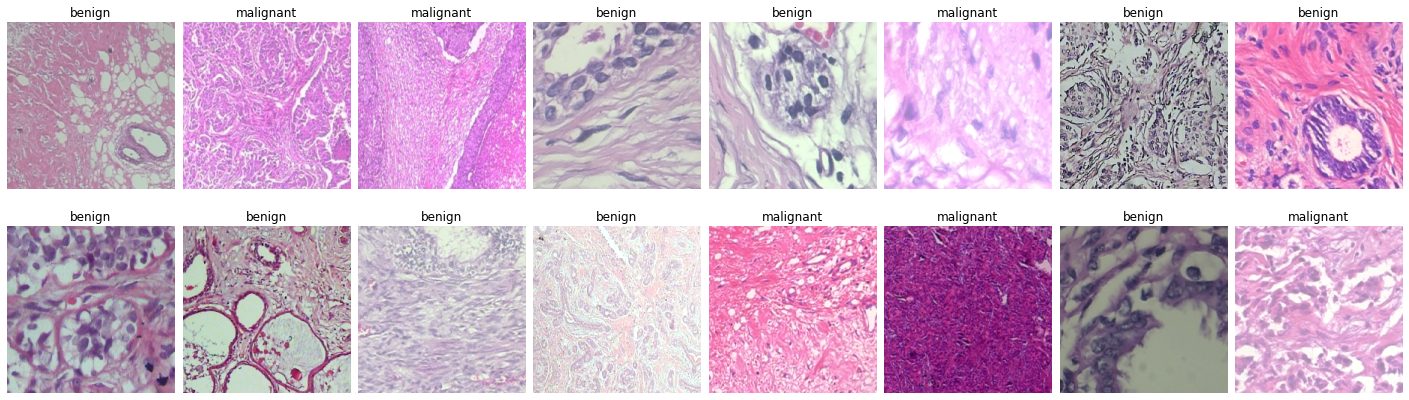

In [ ]:
view_image(train_ds)

In [ ]:
tf.keras.backend.clear_session()
model = build_network(IMAGE_SIZE)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
clr_scheduler = tfa.optimizers.CyclicalLearningRate( 
    initial_learning_rate=2e-1,  maximal_learning_rate=7e-3, 
    step_size=3*(SAMPLE_SIZE//BATCH_SIZE),  
    scale_fn=lambda x: 1 / (2.0 ** (x - 1)), 
    scale_mode='cycle'
)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
]

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=clr_scheduler) , 
    loss=tf.keras.losses.BinaryCrossentropy(), 
    metrics=METRICS
)

history = model.fit(
    train_ds, 
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    callbacks = [checkpoint_cb],
    validation_data=valid_ds,
)
training_history(history.history)

NameError: ignored

In [ ]:
test_df = test_df.sample(frac=1).reset_index(drop=True)
test_ds = tf.data.Dataset.from_tensor_slices(img_dir+test_df.path) 
test_ds = test_ds.map(decode_test,num_parallel_calls=AUTOTUNE).batch(len(test_df))
test_img = next(iter(test_ds))
test_index = test_df.label_int.values
test_label = test_df.label.values

test_pred = model.predict(test_ds)
pred_index = np.round(test_pred).astype('uint8')
pred_label = np.array(class_names)[pred_index]

print(classification_report(test_index, pred_index, target_names=class_names,zero_division=0))
print('f1_score        :', f1_score(test_index, pred_index, average='micro'))
print('accuracy_score  :', accuracy_score(test_index, pred_index))

cm = skplt.metrics.plot_confusion_matrix(test_label, pred_label, figsize=(8, 8), normalize=False)

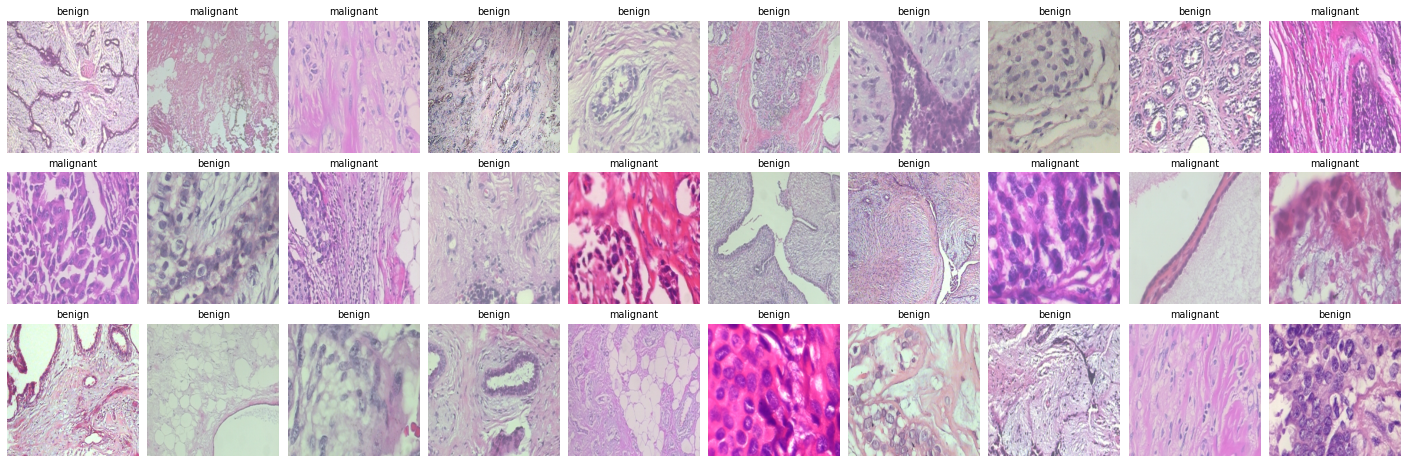

In [ ]:
prediction_df = pd.DataFrame({'filename':test_df.filename.values,'actual':test_df.label.values, 'prediction': np.squeeze(pred_label),'path':test_df.path.values,})
wrong_df = prediction_df[prediction_df.actual != prediction_df.prediction].reset_index(drop=True)

#view first 30 prediction
view_prediction()